# 1) Python

Write a function that will be passed an integer value. Your function should sum up all the positive integers that are less than or equal to the passed in value. For example, if the number 5 were passed to the function, the function should return 15 because 5+4+3+2+1 = 15. If it were passed 7 it should return 28 because 7+6+5+4+3+2+1 = 28.

You can name your function whatever you like. In order to verify what the function is returning, call your function and pass it an integer of your choosing.

The following test-cases should all pass: 

yourFunction(0) => 0

yourFunction(1) => 1

yourFunction(2) => 3

yourFunction(3) => 6

yourFunction(4) => 10

yourFunction(5) => 15


In [0]:
##### Your Code Here #####

def sum_of_less_than(num):
  num += 1
  add = []
  for i in range(num):
    add.append(i)
    add.reverse()
  return sum(add)
    

In [0]:
check = sum_of_less_than(0)
print(check)

0


#2) Data Exploration

- Import Pandas
- Read the CSV found at this URL into a pandas dataframe: 
    [NFL Plays Dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/NFL-Plays-Small.csv)
- Output the size of the dataframe
- Output the first 5 rows of the dataframe
- Find the number of missing values in each column
- Fill the NaN (missing) values using [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
- Create a scatterplot using the 'ydstogo' and 'Drive' variables

Feel free to add extra text and code cells as necesary.

In [0]:
##### Your Code Here #####
import pandas as pd

In [0]:
#read the data into pandas
nfl = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/NFL-Plays-Small.csv")


In [0]:
#size of the dataframe
nfl.shape

(10000, 13)

In [0]:
#output the first five rows of the dataframe
nfl.head()

,GameID,Drive,qtr,down,time,yrdline100,ydstogo,posteam,DefensiveTeam,Yards.Gained,Touchdown,PlayType,Season
0,2014122806,9,3,1.0,14:57,65.0,10,MIN,CHI,0,0,Pass,2014
1,2014110600,15,3,1.0,15:00,80.0,10,CLE,CIN,0,0,Run,2014
2,2013091501,22,4,4.0,07:24,51.0,6,CLE,BAL,0,0,Punt,2013
3,2017010108,19,3,2.0,01:41,50.0,2,PIT,CLE,9,0,Pass,2016
4,2017101504,29,4,1.0,04:58,69.0,10,DET,NO,0,0,No Play,2017


In [0]:
nfl.columns

Index(['GameID', 'Drive', 'qtr', 'down', 'time', 'yrdline100', 'ydstogo',
       'posteam', 'DefensiveTeam', 'Yards.Gained', 'Touchdown', 'PlayType',
       'Season'],
      dtype='object')

Rename columns to snakecase; more pythonic

In [0]:
new_name ={'GameID': 'game_id', 'Drive': 'drive', 'qtr':'qtr', 'down':'down', 'time':'time', 'yrdline100':'yrd_line100', 'ydstogo':'yrds_togo',
       'posteam':'posteam', 'DefensiveTeam':'defensive_team', 'Yards.Gained':'yrds_gained', 'Touchdown':'touch_down', 'PlayType':'play_type',
       'Season':'season'}

In [0]:
nfl.rename(columns=new_name, inplace=True)

In [0]:
nfl.tail()

,game_id,drive,qtr,down,time,yrd_line100,yrds_togo,posteam,defensive_team,yrds_gained,touch_down,play_type,season
9995,2016120406,15,3,4.0,07:56,26.0,3,LA,NE,0,0,Field Goal,2016
9996,2016091105,20,4,1.0,08:20,84.0,10,NO,OAK,0,0,No Play,2016
9997,2016100910,15,3,2.0,08:09,39.0,2,OAK,SD,0,0,No Play,2016
9998,2012121000,12,2,3.0,00:55,55.0,3,NE,HOU,0,0,Pass,2012
9999,2011112000,7,2,2.0,05:59,33.0,7,MIN,OAK,4,0,Pass,2011


In [0]:
#show the number of missing values per column
nfl.isnull().sum()

game_id              0
drive                0
qtr                  0
down              1495
time                 4
yrd_line100         16
yrds_togo            0
posteam            624
defensive_team     624
yrds_gained          0
touch_down           0
play_type            0
season               0
dtype: int64

In [0]:
nfl['posteam'].value_counts(dropna=False).head()

NaN    624
DET    332
IND    317
BAL    315
NE     312
Name: posteam, dtype: int64

In [0]:
nfl['defensive_team'].value_counts(dropna= False).head()

NaN    624
CHI    326
TB     316
BAL    315
NYJ    314
Name: defensive_team, dtype: int64

In [0]:
nfl['yrd_line100'].value_counts().head()

35.0    535
80.0    371
75.0    237
2.0     228
30.0    219
Name: yrd_line100, dtype: int64

Replace  categorical columns with the most common team and numerical colums with the mean of values of the respective column.

In [0]:
nfl.fillna({'posteam':'DET', 'defensive_team':'CHI', 'yrd_line100':nfl.yrd_line100.mean(), 'down':nfl.down.mean()}, inplace=True)

Replace time with ffill method

In [0]:
nfl.fillna(method='ffill', inplace=True)

In [0]:
nfl.isnull().sum()

game_id           0
drive             0
qtr               0
down              0
time              0
yrd_line100       0
yrds_togo         0
posteam           0
defensive_team    0
yrds_gained       0
touch_down        0
play_type         0
season            0
dtype: int64

scatter plot of yrds_togo and drive

In [0]:
import matplotlib.pyplot as plt

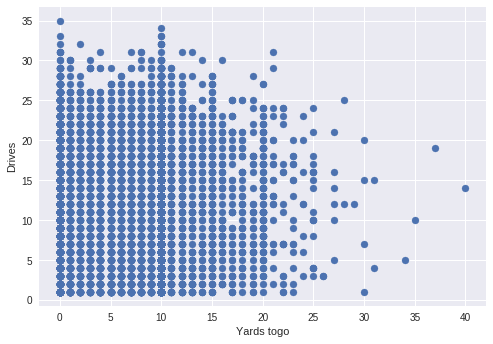

In [0]:
plt.scatter(x=nfl['yrds_togo'], y=nfl['drive'])
plt.xlabel('Yards togo')
plt.ylabel('Drives')
plt.show()

# 3) Statistics

- Calculate the Mean, Median, and Mode of the "Drives" column 
- Create a histogram to show the distribution of the "Drives" column.

Feel free to add extra text and code cells as necesary.

mean of column drive

In [0]:
##### Your Code Here #####
nfl.drive.mean()

12.3851

mode of column 'drive'

In [0]:
nfl.drive.mode()

0    1
dtype: int64

median of column drive

In [0]:
nfl.drive.median()

12.0

Histogram depicting the distribution of column 'drive'

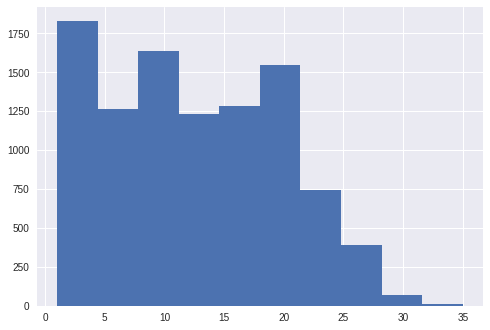

In [0]:
plt.hist(nfl['drive']);

#4) Hypothesis Testing

- Print the summary statistics of the dataset using the [.describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) function (This should help you check the work you did above)
- Use a method other than the .describe() function to calculate the standard deviation of the "Drive" column.
- How many standard deviations away from the mean is a value of 20 Drives?
- What would be the corresponding standard score (z-score) for a value of 20 Drives? 

Feel free to add extra text and code cells as necesary.

In [0]:
##### Your Code Here #####

In [0]:
#summary statistics
nfl.describe()

,game_id,drive,qtr,down,yrd_line100,yrds_togo,yrds_gained,touch_down,season
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.013197e+09,12.385100,2.574800,2.001764,48.762520,7.329600,4.814000,0.027400,2013.057700
std,2.573354e+06,7.257194,1.141111,0.920859,25.015031,4.873514,8.761819,0.163254,2.579309
min,2.009091e+09,1.000000,1.000000,1.000000,1.000000,0.000000,-28.000000,0.000000,2009.000000
25%,2.011102e+09,6.000000,2.000000,1.000000,30.000000,3.000000,0.000000,0.000000,2011.000000
50%,2.013112e+09,12.000000,3.000000,2.000000,50.000000,9.000000,1.000000,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,70.000000,10.000000,7.000000,0.000000,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,99.000000,40.000000,98.000000,1.000000,2017.000000


standard deviation of the "Drive" column using numpy

In [0]:
#calculating standard deviation with numpy
import numpy as np
np.std(nfl.drive)

7.256831125911639

standard deviations away from the mean for  a value of 20 Drives

In [0]:
#standard deviation
v = (20-np.mean(nfl.drive))**2
s  = v**0.5
s


7.6149000000000004

corresponding standard score (z-score) for a value of 20 Drives

In [0]:
#standard score for 20 drives
(20- np.mean(nfl.drive))/np.std(nfl.drive)

1.0493423186891895